In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

###  Reading and Understanding the Data

In [2]:
# Read the data from csv file
bike= pd.read_csv(r"C:\Users\user\Downloads\day (1).csv")

In [3]:
#Displays the size of the data 
bike.shape

(730, 16)

In [4]:
#checking out for detailed info about the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Displays summary statistics of the DataFrame
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check for missing values in the DataFrame
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Drop specified columns from the DataFrame
bike.drop(['instant','dteday', 'casual', 'registered'], axis=1, inplace=True)

In [8]:
# List the columns in the DataFrame
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [9]:
# Display DataFrame information after dropping columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
# renaming few columns for better readibility`
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [11]:
# Display the updated DataFrame
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Convert the specified columns to categorical type
columns_to_convert = ['season', 'month', 'weekday', 'weathersit', 'holiday', 'workingday', 'year']
bike[columns_to_convert] = bike[columns_to_convert].astype('category')

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [14]:
# Count unique values in each column of the DataFrame
bike.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

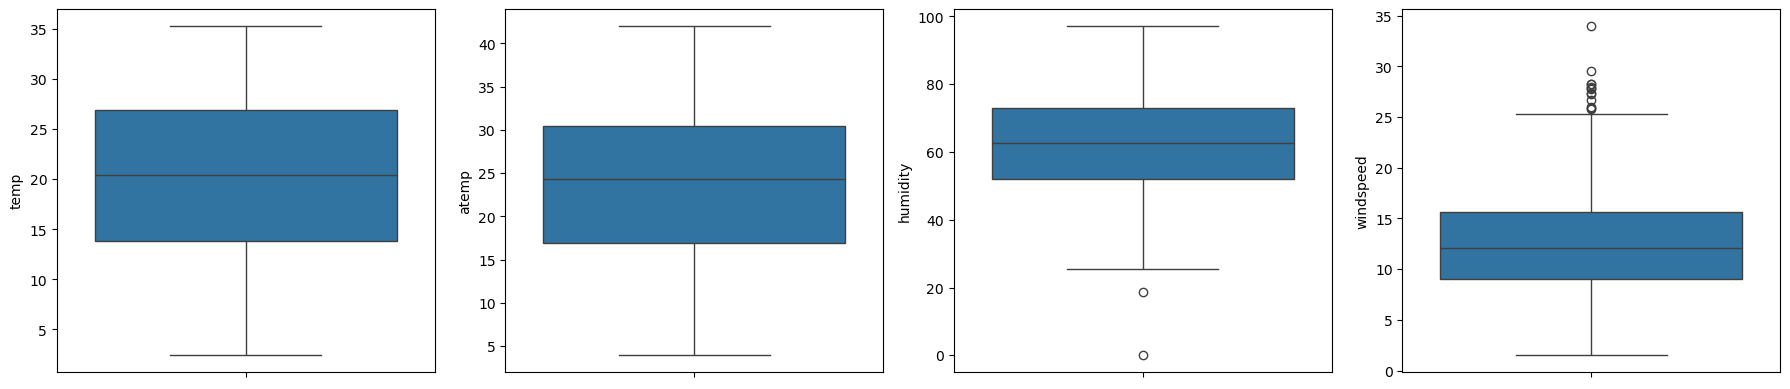

In [357]:
# Generate box plots for 'temp', 'atemp', 'hum', and 'windspeed' to visualize their distributions
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18, 4))

for i in range(len(cols)):
    plt.subplot(1, 4, i + 1) 
    sns.boxplot(y=cols[i], data=bike) 

plt.tight_layout()
plt.show()

"The plots clearly indicate that there are no outliers present in the data."

In [15]:
# Encoding/mapping the season column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
# Encoding/mapping the month column

bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
# Encoding/mapping the weekday column

bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
# Encoding/mapping the weathersit column

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [20]:
bike.head(7)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,0,Misty,8.057402,10.44195,49.8696,11.304642,1510


### Visualising the Data

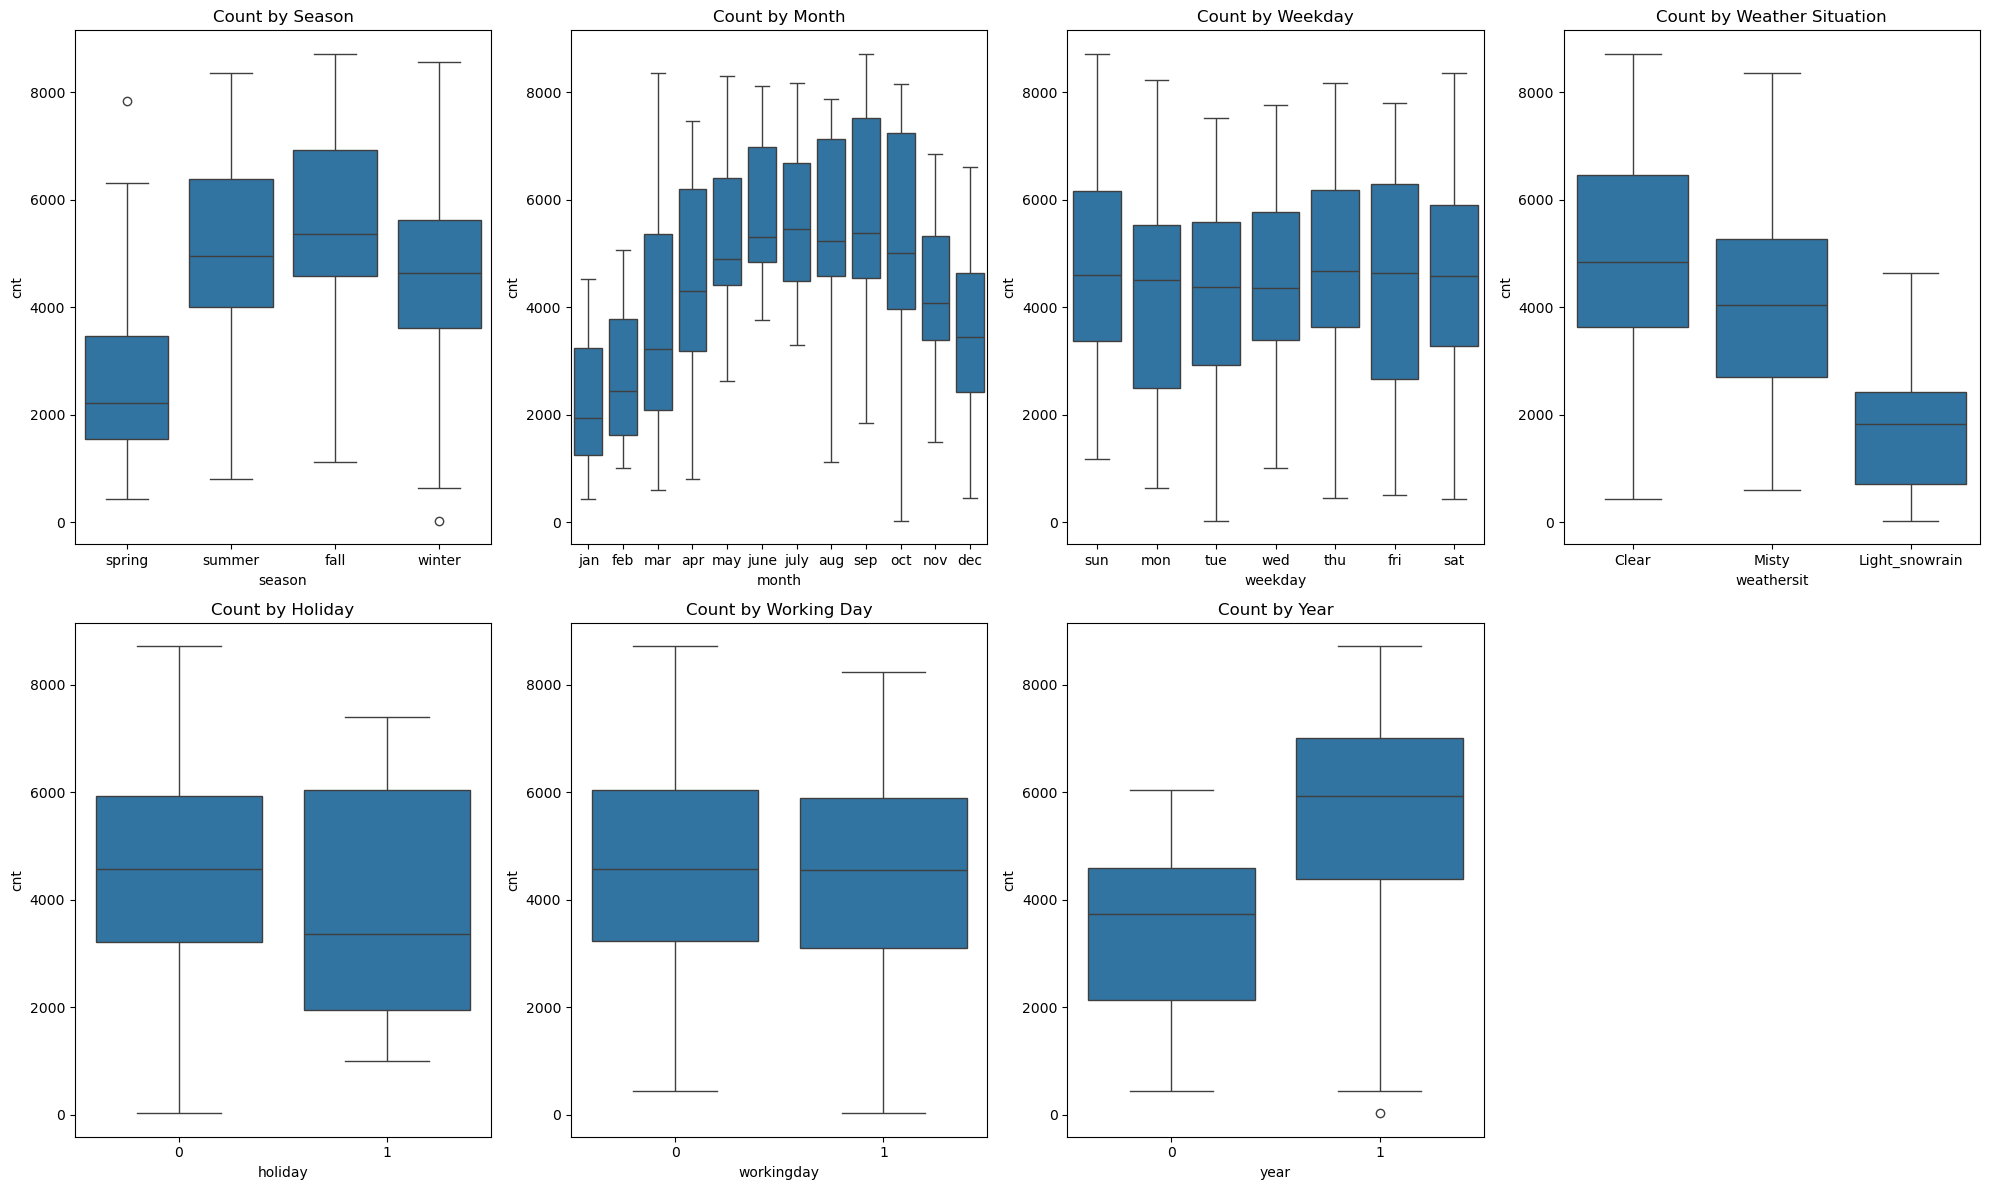

In [21]:
# Analyzing and visualizing the categorical columns
# to see how predictor variables relate to the target variable 'cnt'

plt.figure(figsize=(20,12))

# Boxplot for seasons against count
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.title('Count by Season')

# Boxplot for months against count
plt.subplot(2, 4, 2)
sns.boxplot(x='month', y='cnt', data=bike)
plt.title('Count by Month')

# Boxplot for weekdays against count
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.title('Count by Weekday')

# Boxplot for weather situations against count
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.title('Count by Weather Situation')

# Boxplot for holidays against count
plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.title('Count by Holiday')

# Boxplot for working days against count
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.title('Count by Working Day')

# Boxplot for years against count
plt.subplot(2, 4, 7)
sns.boxplot(x='year', y='cnt', data=bike)
plt.title('Count by Year')

# Display all plots
plt.tight_layout()
plt.show()


In [365]:
# Function to create bar plots for categorical columns in the bike dataset
def plot_cat_columns(column):
    plt.figure(figsize=(10, 5))

    # Bar plot showing counts for the categorical column
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike)
    plt.title(f'Count by {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')

    # Bar plot showing counts by the categorical column, with hue for year
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike, hue='year', palette='Set1')
    plt.title(f'Count by {column.capitalize()} (by Year)')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Year', labels=['2018', '2019'])

    # Display the plots
    plt.tight_layout()
    plt.show()


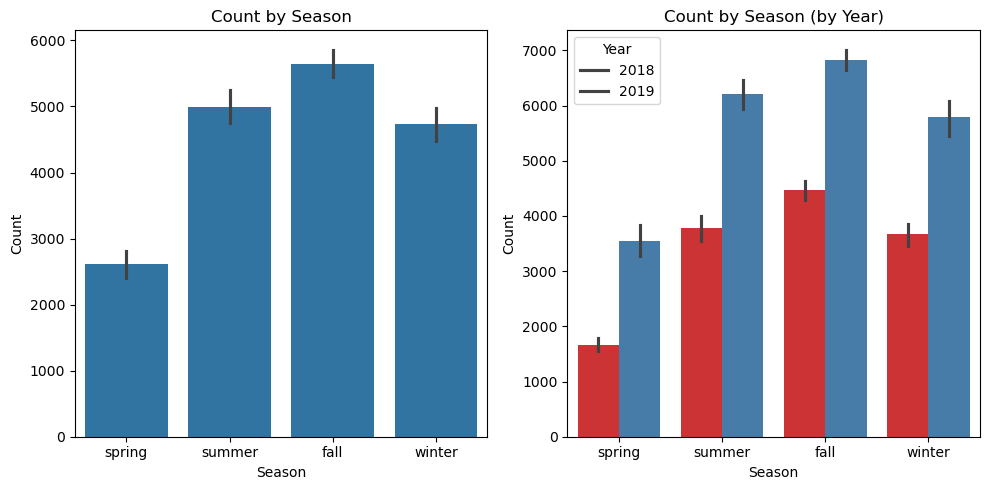

In [112]:
# plotting visualization for season
plot_cat_columns('season')

* The fall season attracted the highest number of bookings, with significant increases in counts across all seasons from 2018 to 2019. However, winter experienced a slight decrease in bookings during this time.

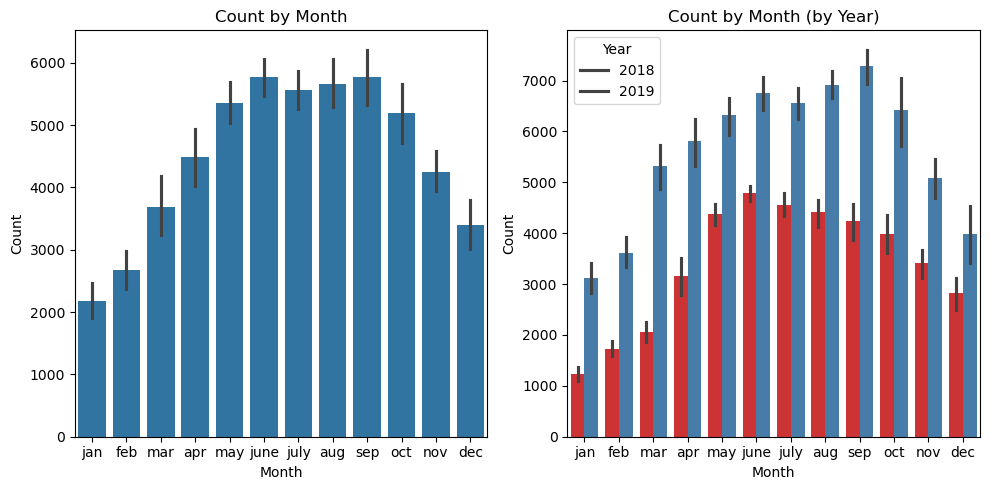

In [113]:
# plotting visualization for month column
plot_cat_columns('month')

* Most bookings occurred from May to October. The trend shows an increase from the beginning of the year to mid-year, followed by a decline as the year comes to a close. Additionally, the number of bookings for each month has risen from 2018 to 2019

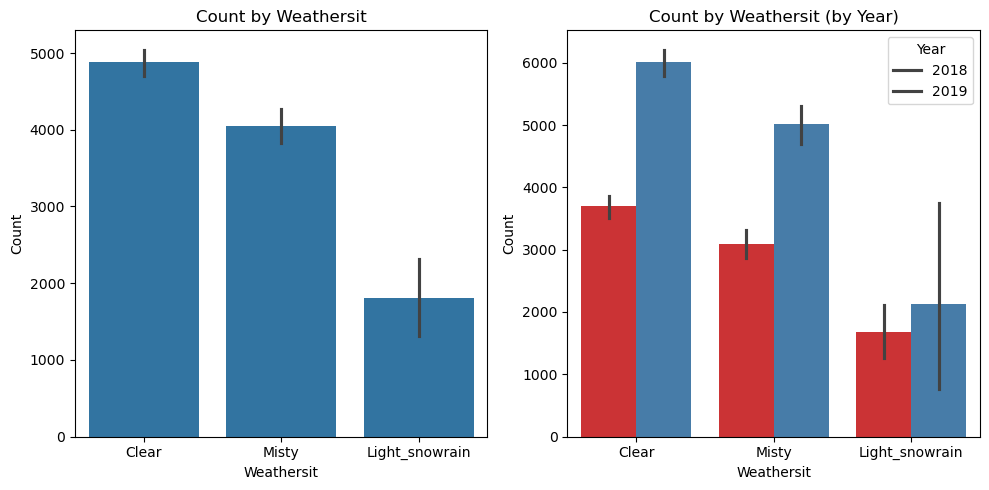

In [114]:
# plotting visualization for weathersit column
plot_cat_columns('weathersit')

* Clear weather attracted the highest number of bookings, which is to be expected. Additionally, bookings increased for each weather situation in 2019 compared to the previous year.

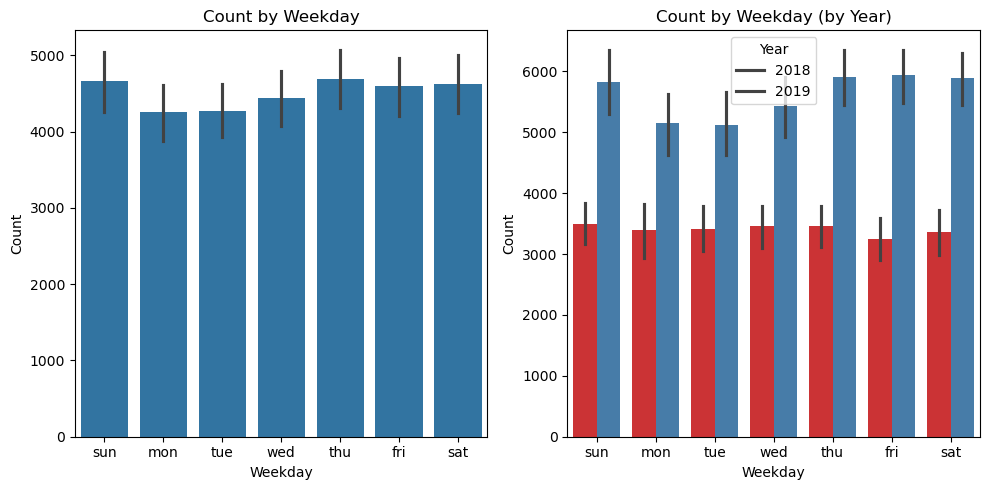

In [115]:
# plotting visualization for weekday column
plot_cat_columns('weekday')

* Thursday, Friday, Saturday, and Sunday experienced more bookings than the earlier days of the week.

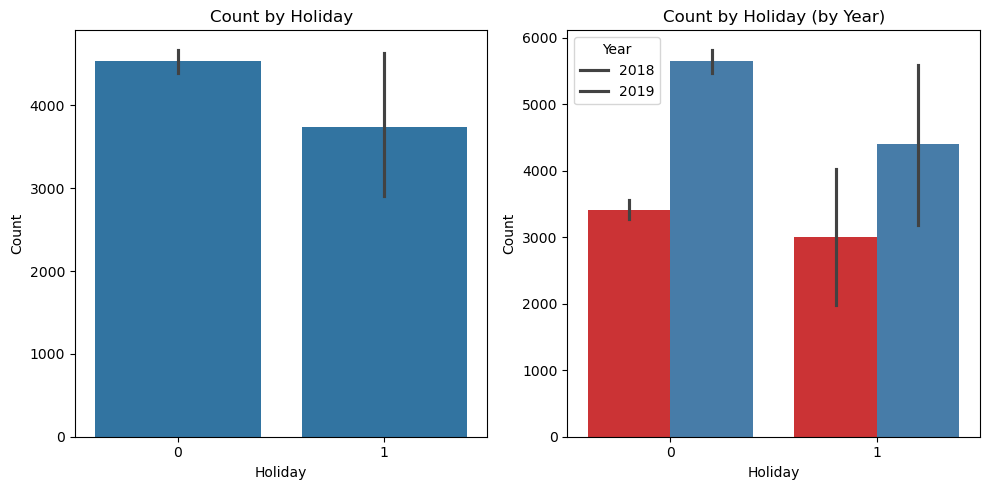

In [116]:
# plotting visualization for holiday column
plot_cat_columns('holiday')

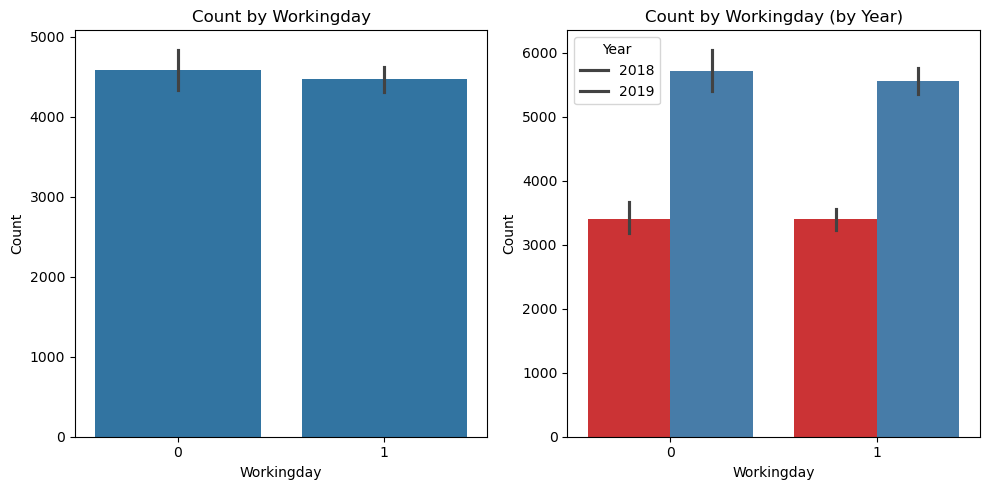

In [117]:
# plotting visualization for workingday column
plot_cat_columns('workingday')

* Bookings were nearly equal on both working and non-working days, but there was an increase from 2018 to 2019.

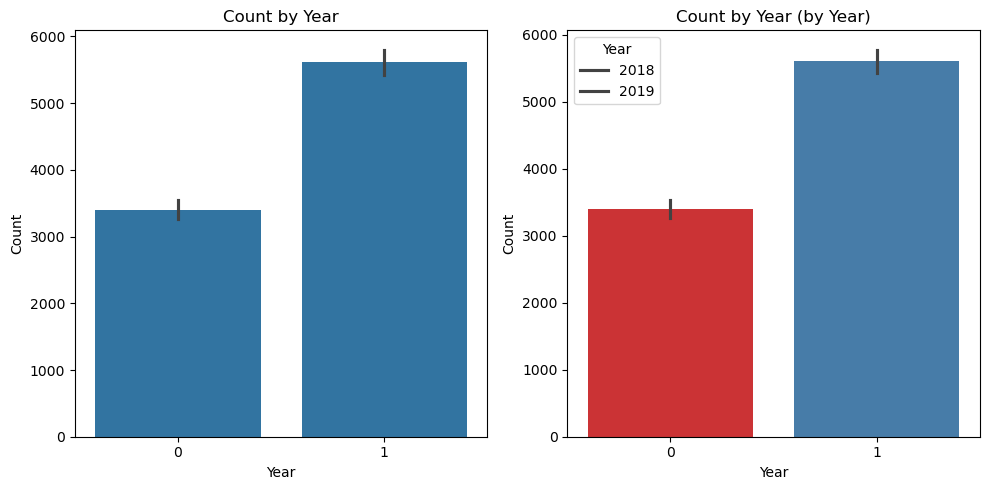

In [118]:
# plotting visualization for workingday column
plot_cat_columns('year')

* 2019 attracted more bookings than the previous year, indicating strong business growth.

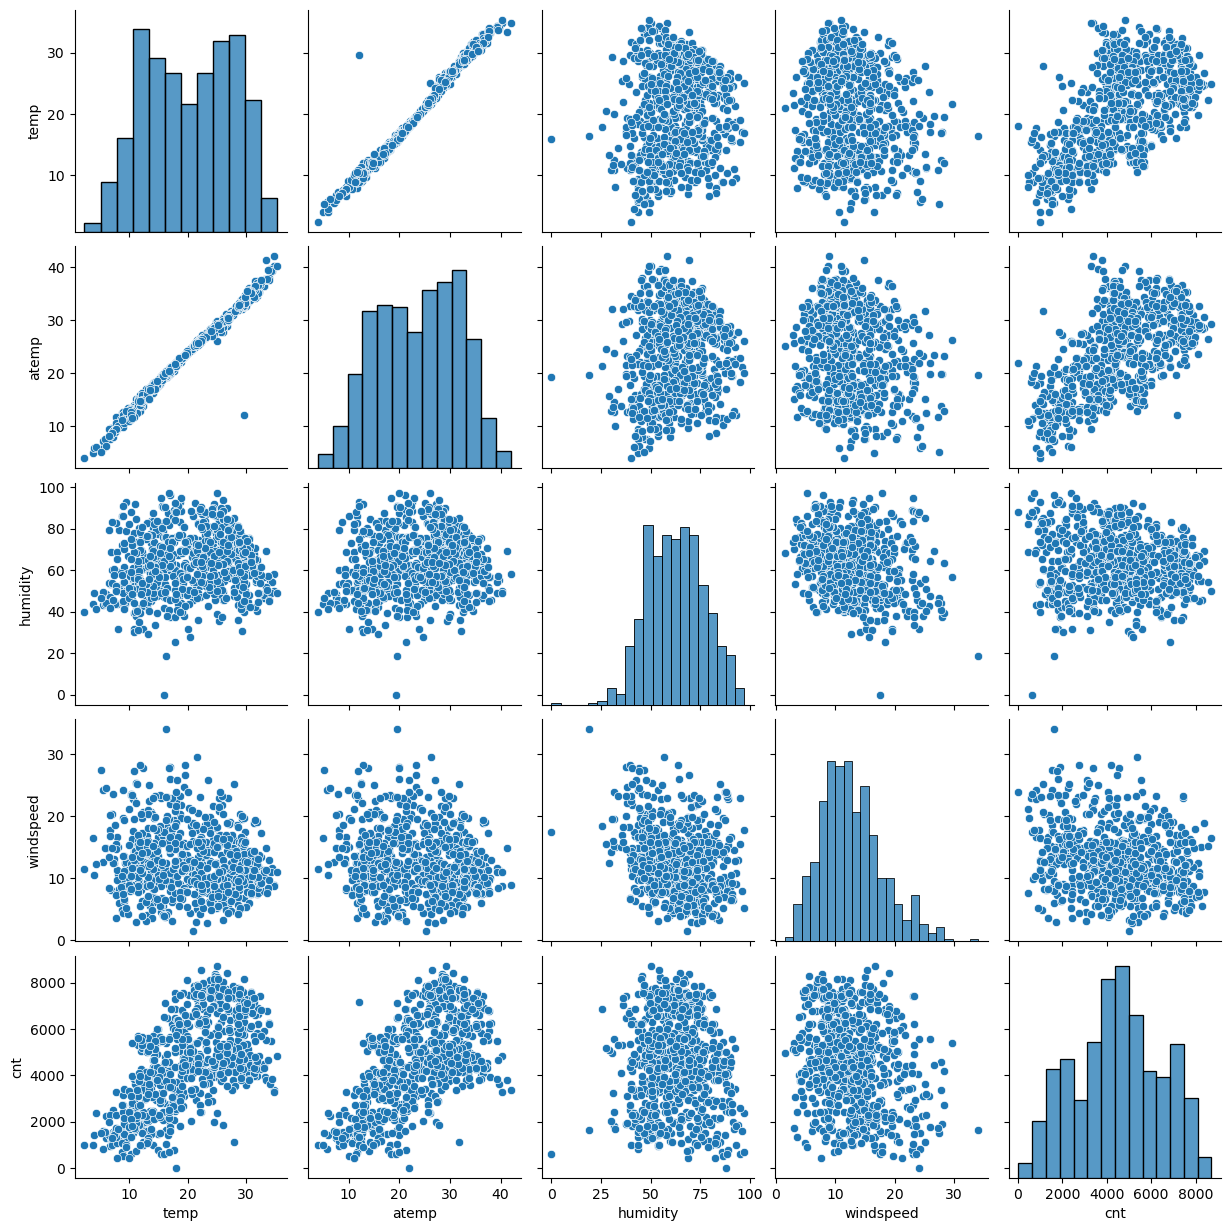

In [119]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

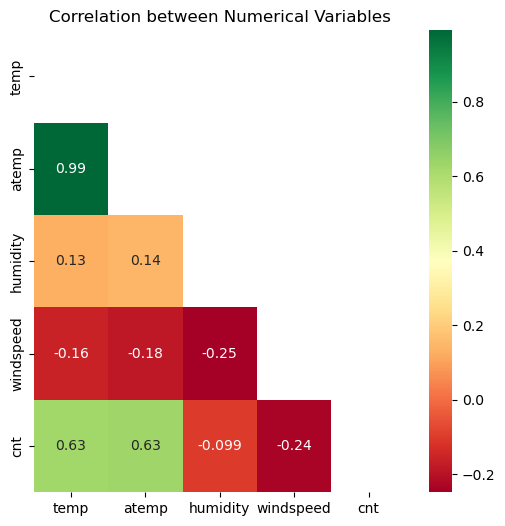

In [22]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()


### Data Preparation

In [23]:
# Create dummy variables without dropping any columns
weekdays_df = pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df = pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df = pd.get_dummies(bike.season,drop_first=True)
months_df = pd.get_dummies(bike.month)

In [24]:
# Merging the dataframe, with the dummy variable dataset. 
bike_new = pd.concat([bike, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [25]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   year            730 non-null    category
 2   month           730 non-null    category
 3   holiday         730 non-null    category
 4   weekday         730 non-null    category
 5   workingday      730 non-null    category
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   humidity        730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    int64   
 12  jan             730 non-null    bool    
 13  feb             730 non-null    bool    
 14  mar             730 non-null    bool    
 15  apr             730 non-null    bool    
 16  may             730 non-null    bool    
 17  june            

In [26]:
# dropping unnecessary columns as we have already created dummy variable out of it.
bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [27]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            730 non-null    category
 1   holiday         730 non-null    category
 2   workingday      730 non-null    category
 3   temp            730 non-null    float64 
 4   atemp           730 non-null    float64 
 5   humidity        730 non-null    float64 
 6   windspeed       730 non-null    float64 
 7   cnt             730 non-null    int64   
 8   jan             730 non-null    bool    
 9   feb             730 non-null    bool    
 10  mar             730 non-null    bool    
 11  apr             730 non-null    bool    
 12  may             730 non-null    bool    
 13  june            730 non-null    bool    
 14  july            730 non-null    bool    
 15  aug             730 non-null    bool    
 16  sep             730 non-null    bool    
 17  oct             

In [28]:
bike_new.shape

(730, 31)

In [29]:
# List of boolean columns to convert
bool_columns = [
    'jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 
    'sep', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed', 'thu', 
    'fri', 'sat', 'Misty', 'Light_snowrain', 'summer', 
    'fall', 'winter'
]

# Convert the boolean columns to integers
bike_new[bool_columns] = bike_new[bool_columns].astype(int)

In [30]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            730 non-null    category
 1   holiday         730 non-null    category
 2   workingday      730 non-null    category
 3   temp            730 non-null    float64 
 4   atemp           730 non-null    float64 
 5   humidity        730 non-null    float64 
 6   windspeed       730 non-null    float64 
 7   cnt             730 non-null    int64   
 8   jan             730 non-null    int32   
 9   feb             730 non-null    int32   
 10  mar             730 non-null    int32   
 11  apr             730 non-null    int32   
 12  may             730 non-null    int32   
 13  june            730 non-null    int32   
 14  july            730 non-null    int32   
 15  aug             730 non-null    int32   
 16  sep             730 non-null    int32   
 17  oct             

### Splitting the Data 

In [31]:
# splitting the dataframe into Train and Test
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [32]:
# check the shape of training datatset
bike_train.shape

(510, 31)

In [33]:
# check the shape of testing datatset
bike_test.shape

(220, 31)

In [34]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [35]:
# verifying the head of dataset before scaling.

bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,jan,feb,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,1,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,0,1,0,1,0,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,1,0,1,0,0


In [36]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [37]:
# verifying the head after appying scaling.

bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,jan,feb,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,1,0,1,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,1,0,0


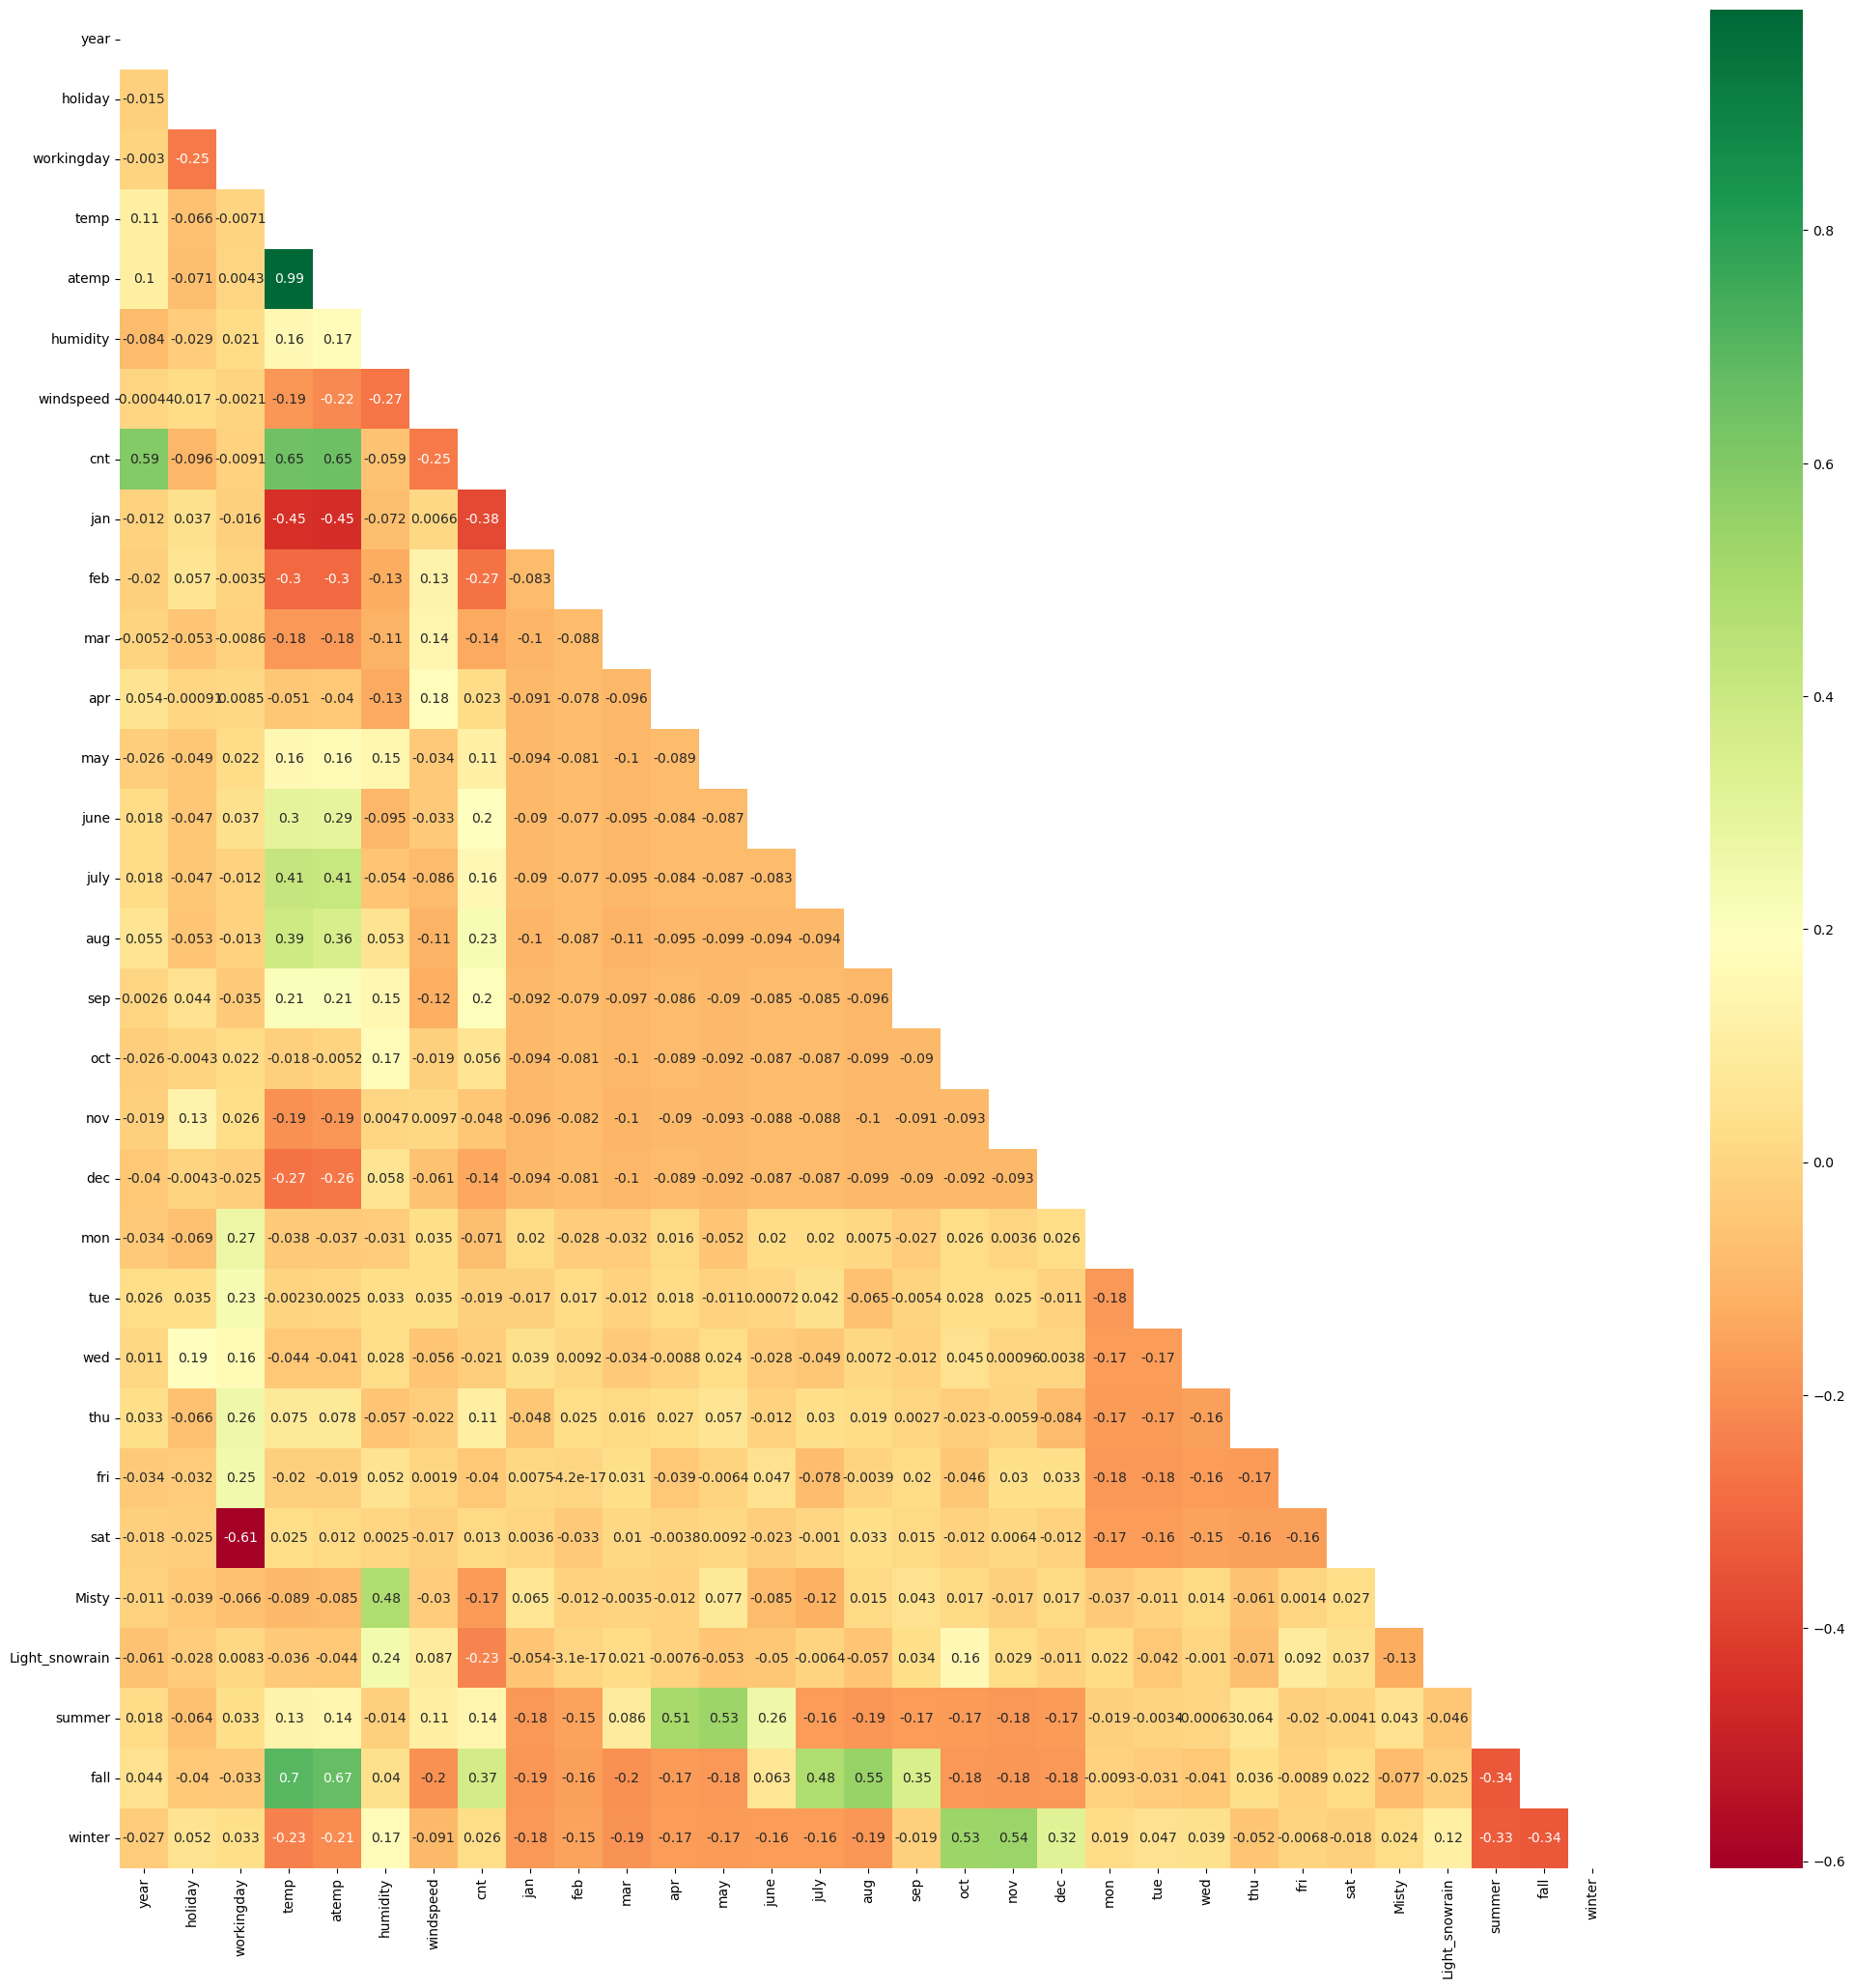

In [38]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

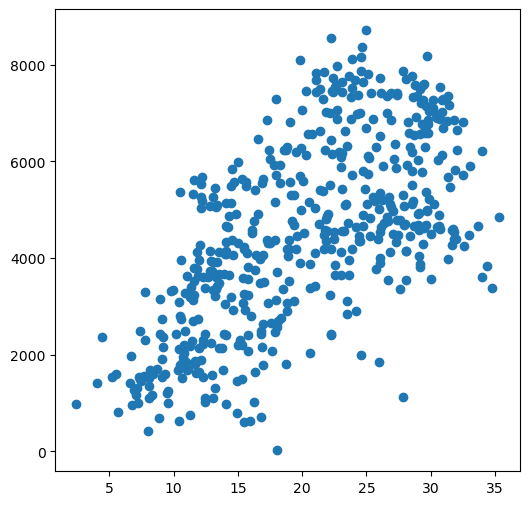

In [147]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


In [39]:
# Building the Linear Model

y_train = bike_train.pop('cnt')
X_train = bike_train

In [40]:
# Initialize the model
lm = LinearRegression()

# Create the RFE object with the model and the desired number of features
rfe = RFE(estimator=lm, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [41]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('jan', True, 1),
 ('feb', False, 2),
 ('mar', False, 15),
 ('apr', False, 16),
 ('may', False, 10),
 ('june', False, 12),
 ('july', True, 1),
 ('aug', False, 11),
 ('sep', True, 1),
 ('oct', False, 14),
 ('nov', True, 1),
 ('dec', True, 1),
 ('mon', False, 8),
 ('tue', False, 9),
 ('wed', False, 7),
 ('thu', False, 5),
 ('fri', False, 6),
 ('sat', False, 13),
 ('Misty', True, 1),
 ('Light_snowrain', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

In [42]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'jan', 'july',
       'sep', 'nov', 'dec', 'Misty', 'Light_snowrain', 'summer', 'fall',
       'winter'],
      dtype='object')


In [43]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'feb', 'mar', 'apr', 'may', 'june', 'aug', 'oct',
       'mon', 'tue', 'wed', 'thu', 'fri', 'sat'],
      dtype='object')

In [44]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [45]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,27.15
3,humidity,21.08
13,fall,7.52
14,winter,4.07
4,windspeed,3.73
12,summer,3.67
10,Misty,2.20
0,year,2.05
8,nov,1.90
5,jan,1.63


### Model Building

In [47]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          8.15e-189
Time:                        01:46:54   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2584      0.029      9.

In [48]:
#  We can drop dec variable as it has high p-value
X_train_new = X_train_rfe.drop(['dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,24.99
3,humidity,18.82
12,fall,7.42
4,windspeed,3.71
11,summer,3.67
13,winter,3.67
9,Misty,2.15
0,year,2.05
8,nov,1.62
6,july,1.61


In [49]:
# Building 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.41e-189
Time:                        01:47:33   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2471      0.028      8.

In [50]:
# We can drop fall variable as it has high VIF and P-value when compared with temp, humidity and fall
X_train_new = X_train_new.drop(['fall'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,18.40
2,temp,12.35
4,windspeed,3.63
12,winter,2.51
9,Misty,2.14
0,year,2.04
11,summer,1.87
8,nov,1.59
6,july,1.55
5,jan,1.54


In [51]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.4
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          9.82e-189
Time:                        01:48:06   Log-Likelihood:                 508.48
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     496   BIC:                            -929.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2468      0.028      8.

In [52]:
# As humidity shows high VIF value we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.15
3,windspeed,3.36
11,winter,2.05
0,year,2.04
10,summer,1.82
7,nov,1.59
8,Misty,1.54
5,july,1.52
6,sep,1.30
4,jan,1.22


In [53]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.4
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.01e-185
Time:                        01:48:52   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -968.2
Df Residuals:                     497   BIC:                            -913.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1485      0.020      7.

In [54]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
2,temp,5.13
3,windspeed,3.34
0,year,2.04
9,summer,1.82
7,Misty,1.54
5,july,1.52
10,winter,1.50
6,sep,1.29
4,jan,1.22
8,Light_snowrain,1.08


In [55]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.5
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          3.40e-186
Time:                        01:49:06   Log-Likelihood:                 496.84
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     498   BIC:                            -918.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1478      0.020      7.

In [56]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.77
3,windspeed,3.31
0,year,2.04
8,summer,1.62
6,Misty,1.53
9,winter,1.42
4,jan,1.21
5,sep,1.21
7,Light_snowrain,1.08
1,holiday,1.04


* VIF value now seems to be good as it came below 5.

In [57]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          2.06e-186
Time:                        01:49:22   Log-Likelihood:                 494.49
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     499   BIC:                            -920.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1522      0.020      7.

In [58]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,year,2.00
7,summer,1.57
5,Misty,1.48
8,winter,1.37
4,sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


In [59]:
# Building 7th linear regression model

X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          2.83e-186
Time:                        01:49:47   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

* We can consider the model lr_7 as it seems to have low multicollinearity among the predictors, and the p-values for all predictors indicate       statistical significance.

In [60]:
# Checking the parameters and their coefficient values
lr_7.params

const             0.125926
year              0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
sep               0.101195
Misty            -0.078375
Light_snowrain   -0.282869
summer            0.088080
winter            0.129345
dtype: float64

### Residual Analysis of the train data 

In [61]:
X_train_lm_7

,const,year,holiday,temp,windspeed,sep,Misty,Light_snowrain,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,1,0


In [62]:
y_train_pred = lr_7.predict(X_train_lm_7)

### Normality of error terms

Text(0.5, 0, 'Errors')

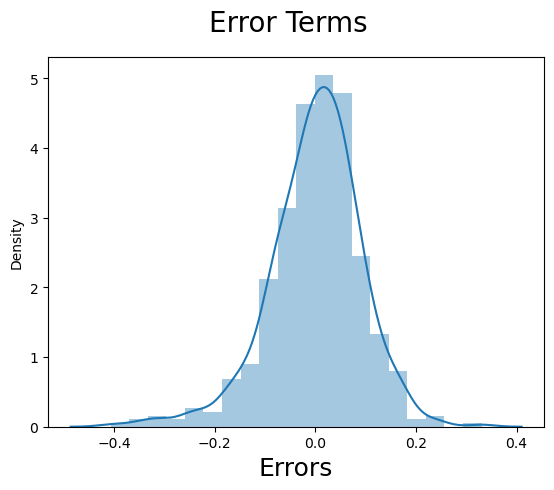

In [63]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Multi Colinearity

In [64]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,year,2.00
7,summer,1.57
5,Misty,1.48
8,winter,1.37
4,sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


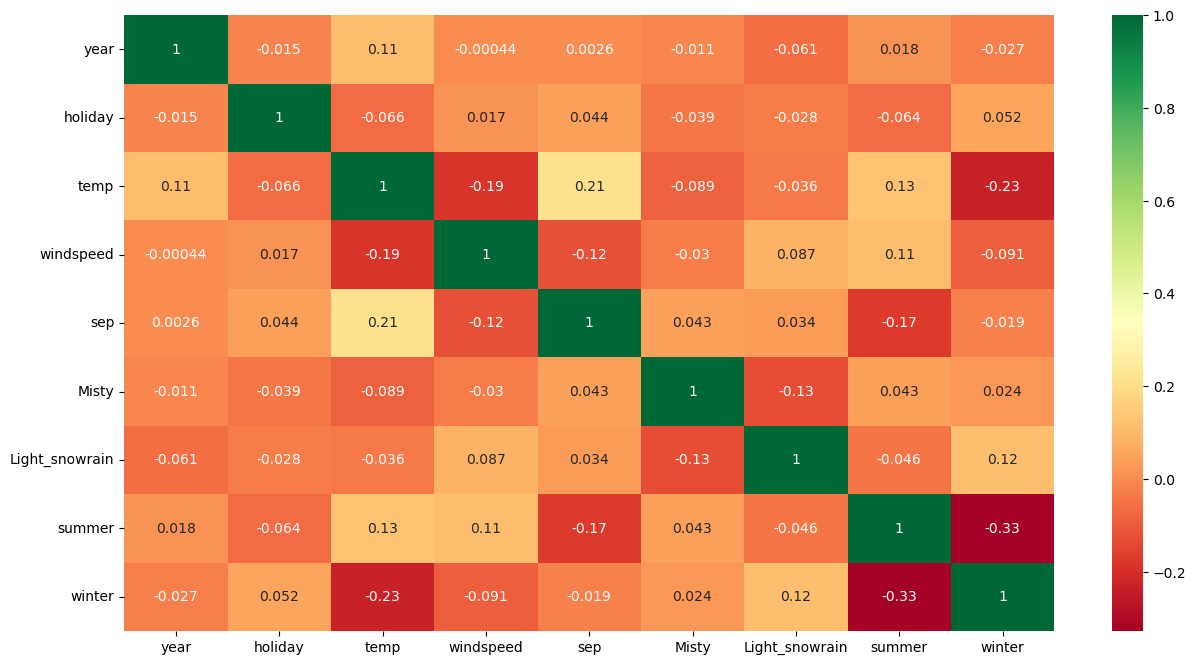

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

* VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity

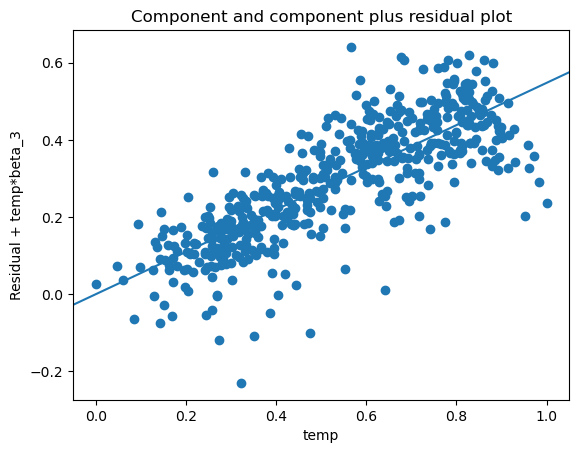

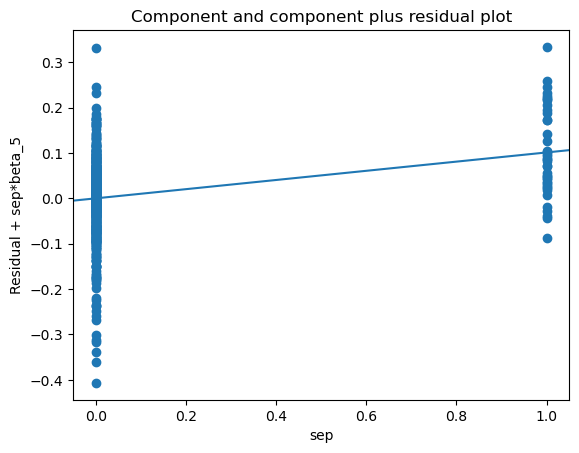

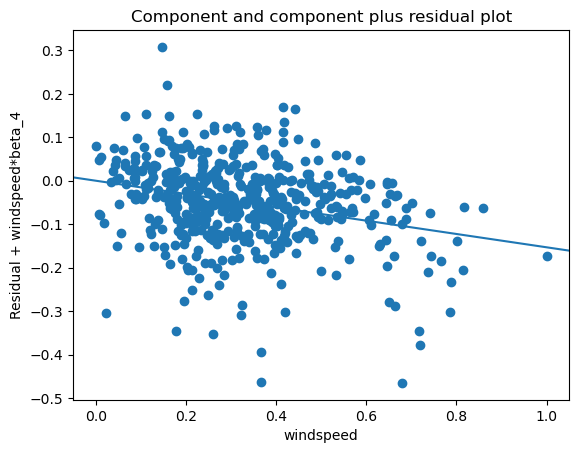

In [65]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_7, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_7, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_7, 'windspeed')
plt.show()

### Homoscedasticity

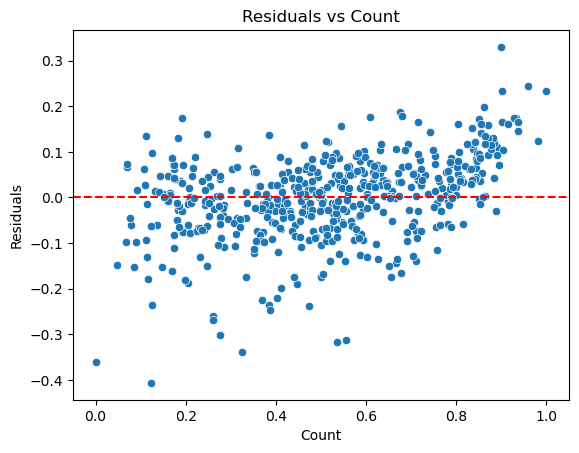

In [66]:
y_train_pred = lr_7.predict(X_train_lm_7)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)  
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Count')
plt.ylabel('Residuals')
plt.title('Residuals vs Count')
plt.show()

### Making Predictions Using the Final Model

In [67]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,jan,feb,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,1,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,1,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,1,0,0,1,0,0


In [68]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [69]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test)

In [70]:
y_pred = lr_7.predict(X_test_lm_7)


In [71]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7942

###  Model Evaluation

Text(0, 0.5, 'y_pred')

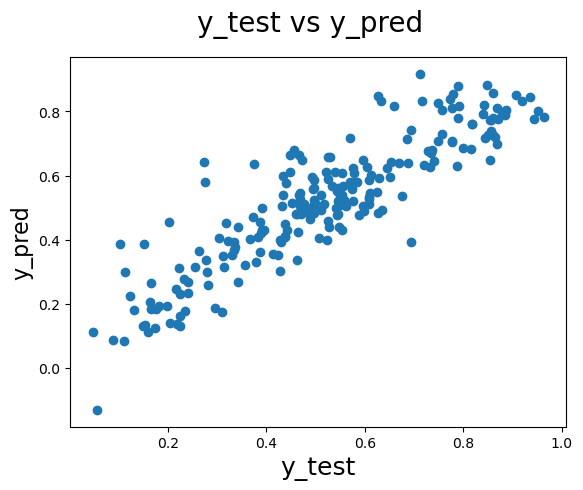

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [77]:
round(lr_7.params,4)


const             0.1259
year              0.2329
holiday          -0.0987
temp              0.5480
windspeed        -0.1532
sep               0.1012
Misty            -0.0784
Light_snowrain   -0.2829
summer            0.0881
winter            0.1293
dtype: float64

* We can see that the equation of our best fitted line is:
cnt=0.1259+0.2329×year−0.0987×holiday+0.5480×temp−0.1532×windspeed+0.1012×sep−0.0784×Misty−0.2829×Light_snowrain+0.0881×summer+0.1293×winter


In [74]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7854


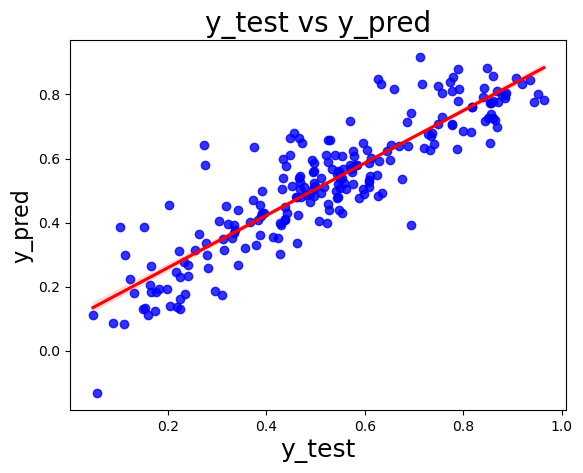

In [75]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Conclusion : 

Significant variables to predict the demand for shared bikes
* year            
* holiday          
* temp              
* windspeed        
* sep              
* Misty            
* Light_snowrain   
* summer            
* winter     